In [ ]:
pip install wordcloud


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
path = r"/content/amazon_com-product_reviews__20200101_20200331_sample (1).csv"
pathpos = r"/content/positive-words.txt"
pathneg = r"/content/negative-words.txt"
pathsto = r"/content/stop.txt"

In [ ]:
with open(pathpos, "r") as f:
    positive_words = [line.strip() for line in f]

with open(pathneg, "r") as f:
    negative_words = [line.strip() for line in f]

with open(pathsto, "r") as f:
    stop_words = [line.strip() for line in f]

In [ ]:
data = pd.read_csv(path)

In [ ]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    words = word_tokenize(text)

    stop_words_set = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words_set]

    preprocessed_text = " ".join(filtered_words)

    return preprocessed_text

In [ ]:
data['Review'] = data['Review'].apply(preprocess_text)

In [ ]:
def get_emotion(review):
    words = review.split()
    pos_count = sum(1 for word in words if word in positive_words)
    neg_count = sum(1 for word in words if word in negative_words)

    if pos_count > neg_count:
        return 'positive'
    elif neg_count > pos_count:
        return 'negative'
    else:
        return 'stop'

data['Emotion'] = data['Review'].apply(get_emotion)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Review'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mon', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['Emotion'], test_size=0.2, random_state=42)

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
    positive       0.70      1.00      0.82         7
        stop       0.00      0.00      0.00         2

    accuracy                           0.70        10
   macro avg       0.23      0.33      0.27        10
weighted avg       0.49      0.70      0.58        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(" ".join(data[data['Emotion'] == 'positive']['Review']))
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(" ".join(data[data['Emotion'] == 'negative']['Review']))
wordcloud_stop = WordCloud(width=800, height=400, background_color='white').generate(" ".join(data[data['Emotion'] == 'stop']['Review']))

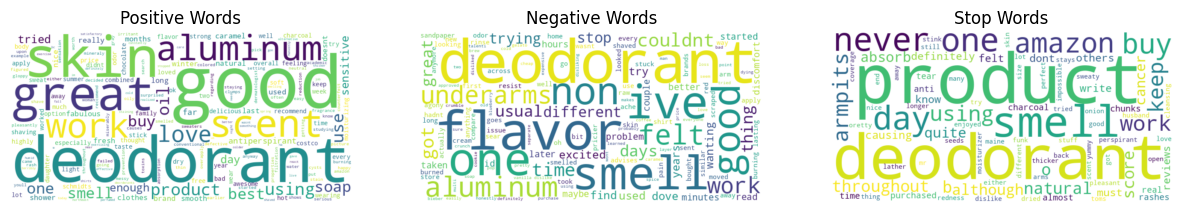

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Words")
plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Words")
plt.subplot(1, 3, 3)
plt.imshow(wordcloud_stop, interpolation='bilinear')
plt.axis("off")
plt.title("Stop Words")
plt.show()